In [2]:
"""
LISAeccentric Official Tutorial: Explicit Data Flow & Functional API
==============================================================================
This script demonstrates the FULL workflow of the 'LISAeccentric' package.
It covers every functional module, explicit parameter inputs, and return value inspections.

Structure:
0. CompactBinary Core: Object creation, Scalar Analysis, Evolution, Serialization.
1. Galactic Nucleus (GN): SMBH-perturbed mergers (Steady State & Starbursts).
2. Globular Clusters (GC): Dynamical mergers (In-cluster vs Ejected).
3. Galactic Field: Fly-by induced mergers (MW & Elliptical).
4. Waveform Analysis: FUNCTIONAL API (Manual inputs for Waveform, SNR, Response).
5. Noise Management: Customizing the LISA sensitivity curve (N2A5 Model).

Usage:
    Ensure the 'LISAeccentric' folder is in the same directory.
    Run: python Tutorial_LISAeccentric_Full.py
==============================================================================
"""
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sciconsts

# Import the package directly
import LISAeccentric

In [3]:
# [CRITICAL CONFIGURATION]
# Set verbose=False to disable internal library printing.
# We will explicitly print inputs and outputs in this script to show the data flow.
LISAeccentric.set_output_control(verbose=False, show_warnings=False)


>>> MODULE 0: THE COMPACT BINARY OBJECT (CORE & I/O)
Description: The fundamental unit of the package. Handles Physics & I/O.

[0.1] Creating a CompactBinary Object
   Input Units: Mass [M_sun], Distance [kpc], SMA [AU]
   Output Object: <CompactBinary [Tutorial_Core_Obj]: M=10.0+10.0 m_sun, a=0.26AU, e=0.9850, Dl=8.0kpc>
   Type Inspection: <class 'LISAeccentric.core.CompactBinary'>

[0.2] Scalar Analysis Methods (Direct Attributes)
   A. compute_merger_time()
      Return Value: 4.8407e+06 [years] (Type: float)
   B. compute_snr_analytical(tobs_yr=4.0)
      Return Value: 10.9644 (Type: float)

[0.3] Orbital Evolution (Predicting Future State)
   Input: delta_t_yr=1000.0, update_self=False
      Return Tuple: a=0.25991616861323 au, e=0.9849951873952284

[0.4] Waveform Generation (Object Method)
   Method: .compute_waveform(tobs_yr=1.0, points_per_peak=50)
   Input : tobs_yr (Observation time), ts/points_per_peak (sample rate/ automatic point Resolution) [optional]
   Note  : Automat

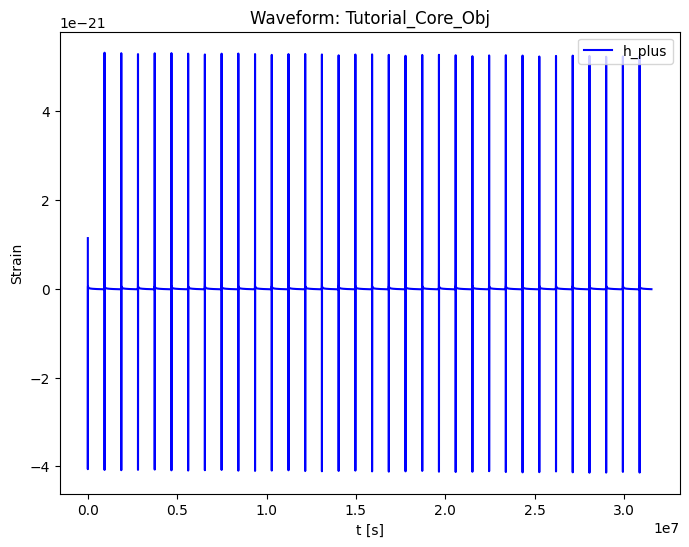

   Output: List of 3 Arrays
      t_vec shape : (918520,)
      h_plus shape: (918520,)

[0.5] Characteristic Strain (Object Method)
   Method: .compute_characteristic_strain(tobs_yr=4.0)
   Input : tobs_yr (Integration time)


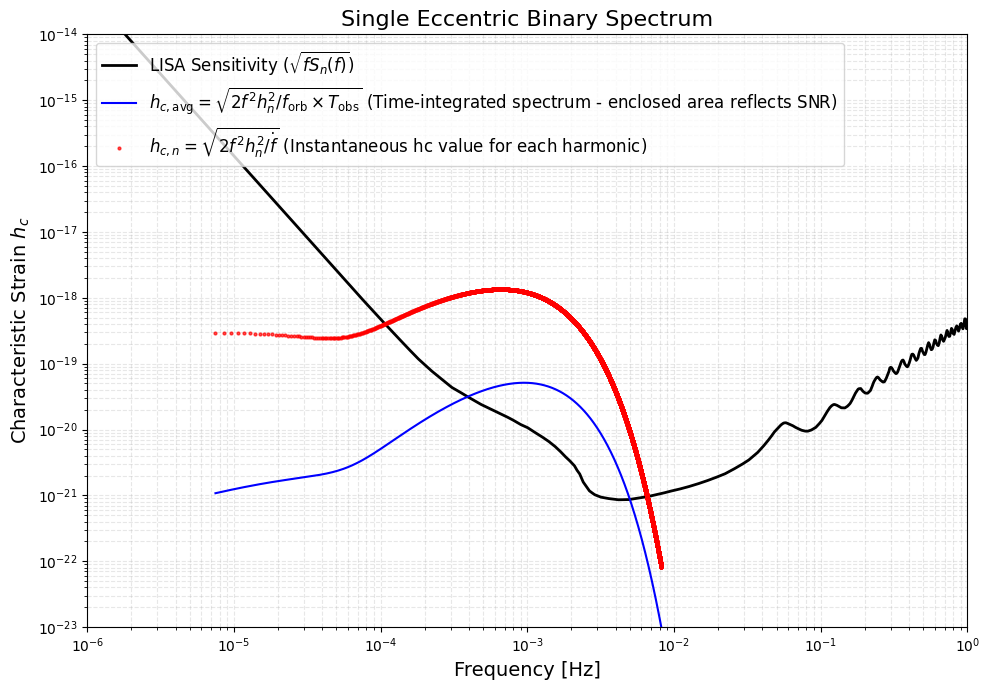

   Output: List of 4 Elements
      [0] Frequency List       (shape: (7663,))
      [1] Time-integrated Spectrum Amplitude (h_c) (shape: (7663,))
      [2] Instantaneous hc value for each harmonics (shape: (7663,))
      [3] Contribution to Snf  (shape: (7663,))

[0.6] Data Serialization (I/O)
   A. to_list(schema='snapshot_std')
      Output: ['Tutorial_Core_Obj', 8.0, 0.26, 0.985, 10.0, 10.0, 0.0] (Type: List)
   B. from_list(data_list=..., schema='snapshot_std')
      Output: <CompactBinary [Imp_Sys]: M=50.0+50.0 m_sun, a=0.50AU, e=0.9000, Dl=16.8kpc, SNR=0.00>


In [4]:
# ==============================================================================
# MODULE 0: THE COMPACT BINARY OBJECT (CORE & I/O)
# ==============================================================================
print("\n" + "="*80)
print(">>> MODULE 0: THE COMPACT BINARY OBJECT (CORE & I/O)")
print("="*80)
print("Description: The fundamental unit of the package. Handles Physics & I/O.")

# --- 0.1 Initialization ---
print("\n[0.1] Creating a CompactBinary Object")
print("   Input Units: Mass [M_sun], Distance [kpc], SMA [AU]")

# Instantiate a specific system
my_binary = LISAeccentric.CompactBinary(
    m1=10.0, m2=10.0, a=0.26, e=0.985, Dl=8.0, label="Tutorial_Core_Obj"
)
print(f"   Output Object: {my_binary}")
print(f"   Type Inspection: {type(my_binary)}")

# --- 0.2 Scalar Analysis (Merger Time & SNR) ---
print("\n[0.2] Scalar Analysis Methods (Direct Attributes)")

# A. Merger Time
print("   A. compute_merger_time()")
t_merge_yr = my_binary.compute_merger_time(verbose=False)
print(f"      Return Value: {t_merge_yr:.4e} [years] (Type: float)")

# B. Analytical SNR
print("   B. compute_snr_analytical(tobs_yr=4.0)")
snr_val = my_binary.compute_snr_analytical(tobs_yr=4.0, verbose=False)
print(f"      Return Value: {snr_val:.4f} (Type: float)")

# --- 0.3 Orbital Evolution ---
print("\n[0.3] Orbital Evolution (Predicting Future State)")
print("   Input: delta_t_yr=1000.0, update_self=False")

# Returns tuple (new_a, new_e)
a_new, e_new = my_binary.evolve_orbit(delta_t_yr=1000.0, update_self=False, verbose=False)
print(f"      Return Tuple: a={a_new} au, e={e_new}")
# --- 0.4 Waveform Generation (Object Method) ---
# [CRITICAL ADDITION: Object-based generation]
print("\n[0.4] Waveform Generation (Object Method)")
print("   Method: .compute_waveform(tobs_yr=1.0, points_per_peak=50)")
print("   Input : tobs_yr (Observation time), ts/points_per_peak (sample rate/ automatic point Resolution) [optional]")
print("   Note  : Automatically uses object's m1, m2, a, e, Dl.")

# Returns [time, h_plus, h_cross]
wf_data_obj = my_binary.compute_waveform(
    tobs_yr=1.0, points_per_peak=50, verbose=False, plot=True
)

if wf_data_obj is not None:
    t_vec_obj, hp_obj, hc_obj = wf_data_obj
    print(f"   Output: List of 3 Arrays")
    print(f"      t_vec shape : {t_vec_obj.shape}")
    print(f"      h_plus shape: {hp_obj.shape}")
else:
    print("   Output: None (Calculation failed)")

# --- 0.5 Characteristic Strain (Object Method) ---
# [CORRECTED SECTION]
print("\n[0.5] Characteristic Strain (Object Method)")
print("   Method: .compute_characteristic_strain(tobs_yr=4.0)")
print("   Input : tobs_yr (Integration time)")

# Returns a LIST of 4 arrays: [freq, hc_spectrum, harmonics, snr_contrib]
strain_res_list = my_binary.compute_characteristic_strain(tobs_yr=4.0, plot=True)

if isinstance(strain_res_list, list) and len(strain_res_list) == 4:
    print(f"   Output: List of 4 Elements")
    print(f"      [0] Frequency List       (shape: {strain_res_list[0].shape})")
    print(f"      [1] Time-integrated Spectrum Amplitude (h_c) (shape: {strain_res_list[1].shape})")
    print(f"      [2] Instantaneous hc value for each harmonics (shape: {strain_res_list[2].shape})")
    print(f"      [3] Contribution to Snf  (shape: {strain_res_list[3].shape})")
else:
    print(f"   Output: {type(strain_res_list)}")

# --- 0.6 Serialization (I/O) ---
print("\n[0.6] Data Serialization (I/O)")

# Export
print("   A. to_list(schema='snapshot_std')")
data_row = my_binary.to_list(schema='snapshot_std')
print(f"      Output: {data_row} (Type: List)")

# Import
print("   B. from_list(data_list=..., schema='snapshot_std')")
raw_in = ["Imp_Sys", 16.8, 0.5, 0.9, 50.0, 50.0, 0.0]
new_obj = LISAeccentric.CompactBinary.from_list(data_list=raw_in, schema='snapshot_std')
print(f"      Output: {new_obj}")


>>> MODULE 1: GALACTIC NUCLEUS (GN)

[1.1] Sampling Eccentricities (LIGO Band @ 10Hz)
   Input: n_samples=5000, max_bh_mass=50.0


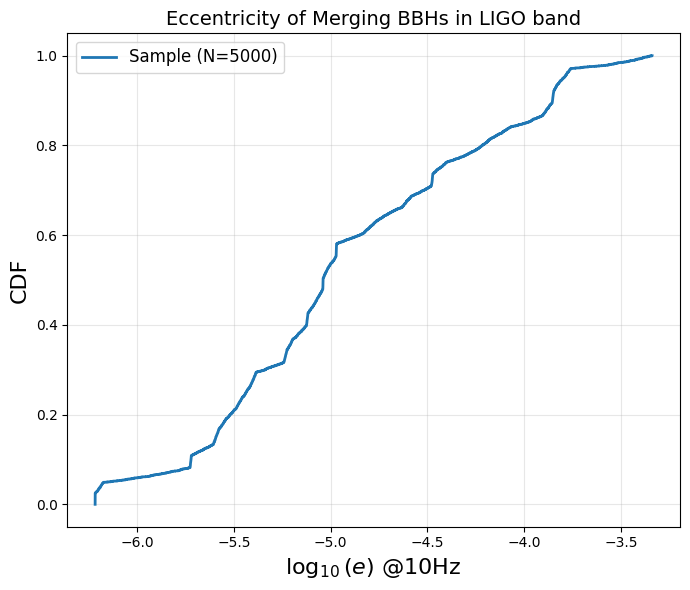

   Output Shape: (5000,)
   Mean Eccentricity: 0.0000

[1.2] Inspecting Progenitor Initial States
   Input: n_inspect=3
   Output List Length: 3
   Sample Item: <CompactBinary [GN_Progenitor]: M=18.9+31.4 m_sun, a=0.90AU, e=0.9894, Dl=8.0kpc>

[1.3] Generating Snapshot (LISA Band)
   Input: rate_gn=2.0 (sys/Myr), age_ync=6.0e6 (yr)


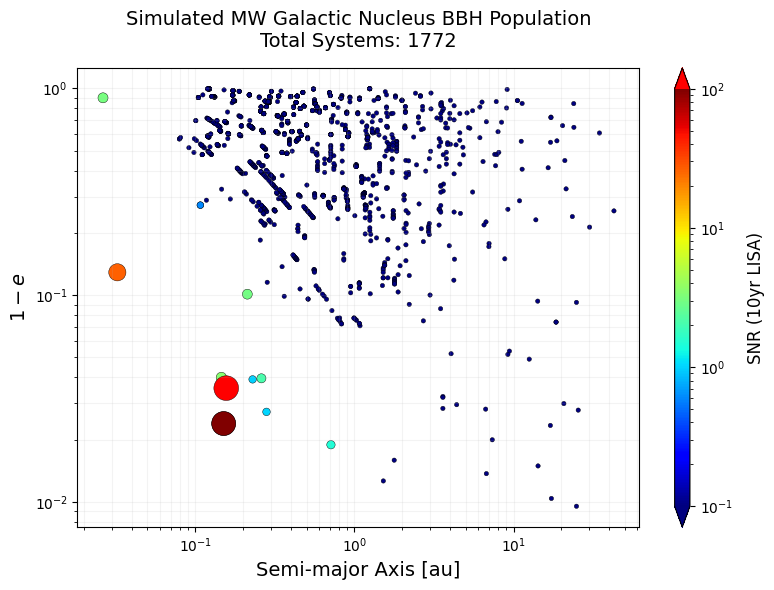

   Output List Length: 1772 systems

[1.4] Calculating GW Peak Frequency (f_peak)
   Input: A highly eccentric system (e -> 1)
   Return Value: f_peak = 1.2120e-03 Hz (Derived from a=1.56e-01, e=0.9645)


In [5]:
# ==============================================================================
# MODULE 1: GALACTIC NUCLEUS (GN)
# ==============================================================================
print("\n" + "="*80)
print(">>> MODULE 1: GALACTIC NUCLEUS (GN)")
print("="*80)

# --- 1.1 Sample Merger Eccentricities ---
print("\n[1.1] Sampling Eccentricities (LIGO Band @ 10Hz)")
print("   Input: n_samples=5000, max_bh_mass=50.0")

# Returns: Numpy Array of eccentricities
gn_e_samples = LISAeccentric.GN.sample_eccentricities(
    n_samples=5000, max_bh_mass=50.0, plot=True
)
print(f"   Output Shape: {np.shape(gn_e_samples)}")
print(f"   Mean Eccentricity: {np.mean(gn_e_samples):.4f}")

# --- 1.2 Inspect Progenitor Population ---
print("\n[1.2] Inspecting Progenitor Initial States")
print("   Input: n_inspect=3")

# Returns: List of CompactBinary objects
gn_progenitors = LISAeccentric.GN.get_progenitor(n_inspect=3)
print(f"   Output List Length: {len(gn_progenitors)}")
if len(gn_progenitors) > 0:
    print(f"   Sample Item: {gn_progenitors[0]}")

# --- 1.3 Generate Snapshot (LISA Band) ---
print("\n[1.3] Generating Snapshot (LISA Band)")
print("   Input: rate_gn=2.0 (sys/Myr), age_ync=6.0e6 (yr)")

# Returns: List of CompactBinary objects (Sorted by SNR usually)
gn_snapshot = LISAeccentric.GN.get_snapshot(
    rate_gn=2.0, age_ync=6.0e6, n_ync_sys=100, max_bh_mass=50.0, plot=True
)
print(f"   Output List Length: {len(gn_snapshot)} systems")

# --- 1.4 Calculate Peak Frequency ---
print("\n[1.4] Calculating GW Peak Frequency (f_peak)")
print("   Input: A highly eccentric system (e -> 1)")

if len(gn_snapshot) > 0:
    # Use actual system from snapshot
    sys = gn_snapshot[0]
    f_peak = LISAeccentric.GN.calculate_fpeak_frequency(system=sys)
    print(f"   Return Value: f_peak = {f_peak:.4e} Hz (Derived from a={sys.a:.2e}, e={sys.e:.4f})")
else:
    # Fallback manual calculation
    f_peak = LISAeccentric.GN.calculate_fpeak_frequency(m1=30, m2=30, a_au=0.1, e=0.99)
    print(f"   Return Value: f_peak = {f_peak:.4e} Hz (Manual Params)")


>>> MODULE 2: GLOBULAR CLUSTERS (GC)

[2.1] Sampling Eccentricities (In-cluster vs Ejected)
   Input: channel_name='Incluster'


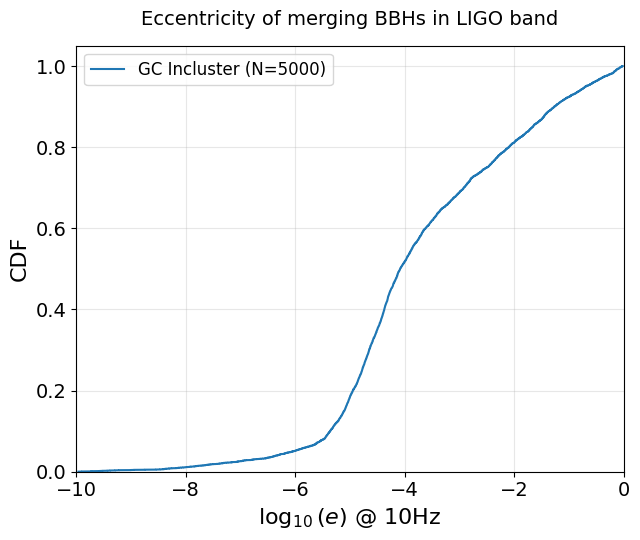

   Output Shape: (5000,)

[2.2] Snapshot: Full 10 MW Realizations


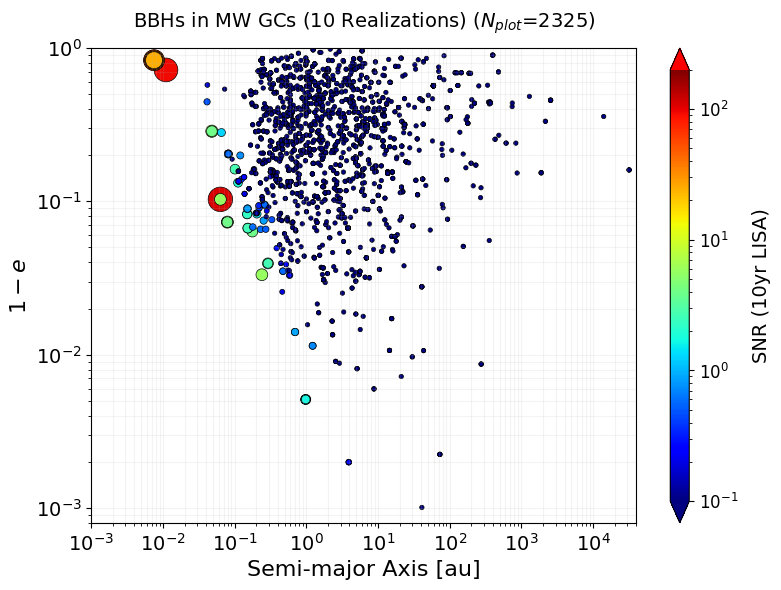

   Output List Length: 2325

[2.3] Snapshot: Single MW Realization


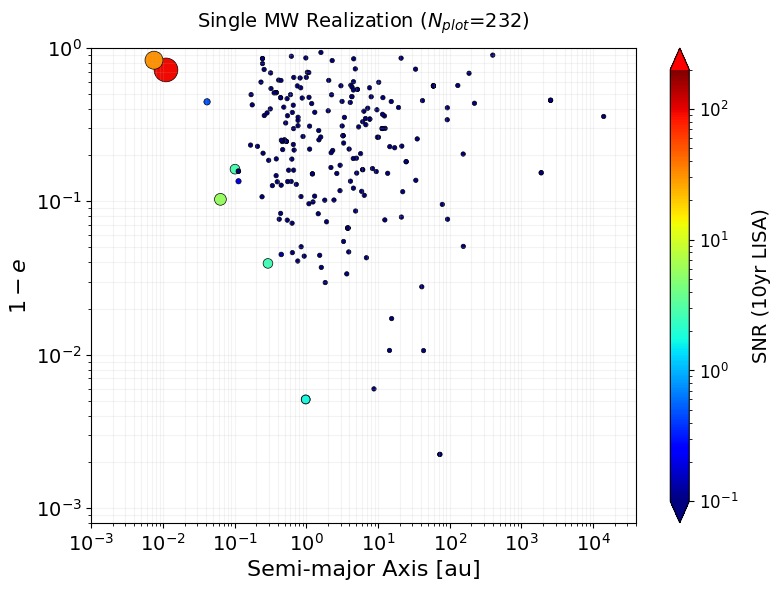

   Output List Length: 232

[2.4] Snapshot: Random 500 Systems


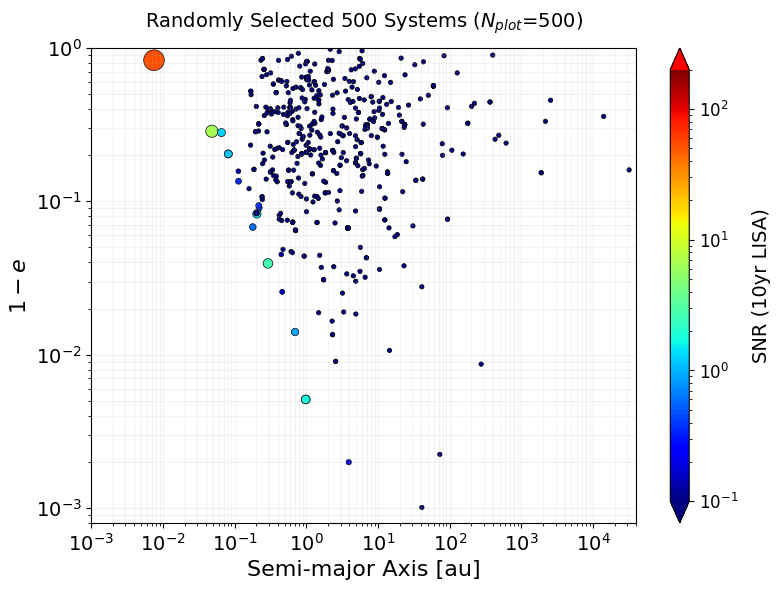

   Output List Length: 500


In [6]:
# ==============================================================================
# MODULE 2: GLOBULAR CLUSTERS (GC)
# ==============================================================================
print("\n" + "="*80)
print(">>> MODULE 2: GLOBULAR CLUSTERS (GC)")
print("="*80)

# --- 2.1 Sample Eccentricities ---
print("\n[2.1] Sampling Eccentricities (In-cluster vs Ejected)")
print("   Input: channel_name='Incluster'")

gc_e_samples = LISAeccentric.GC.sample_eccentricities(
    n=5000, channel_name='Incluster', plot=True
)
print(f"   Output Shape: {np.shape(gc_e_samples)}")

# --- 2.2 Get Snapshots (Modes) ---
print("\n[2.2] Snapshot: Full 10 MW Realizations")
gc_data_full = LISAeccentric.GC.get_snapshot(mode='10_realizations', plot=True)
print(f"   Output List Length: {len(gc_data_full)}")

print("\n[2.3] Snapshot: Single MW Realization")
gc_data_single = LISAeccentric.GC.get_snapshot(mode='single', plot=True)
print(f"   Output List Length: {len(gc_data_single)}")

print("\n[2.4] Snapshot: Random 500 Systems")
gc_data_random = LISAeccentric.GC.get_snapshot(mode='random', n_random=500, plot=True)
print(f"   Output List Length: {len(gc_data_random)}")


>>> MODULE 3: GALACTIC FIELD (FLY-BY)

[3.1] Running Simulation (Milky Way Model)
   Input: Detailed Physics & Galaxy Parameters (fbh=7.5e-4, fgw=10.0...)
   Action: Performs MC simulation and saves results to disk (No return value).
   Status: Simulation completed and saved.

[3.2] Inspecting Field Progenitors


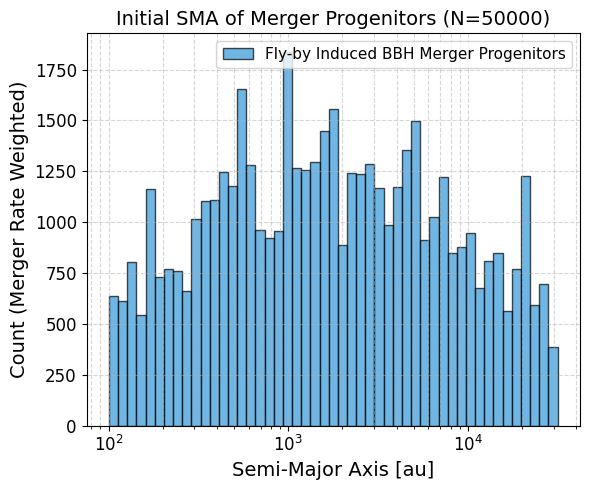

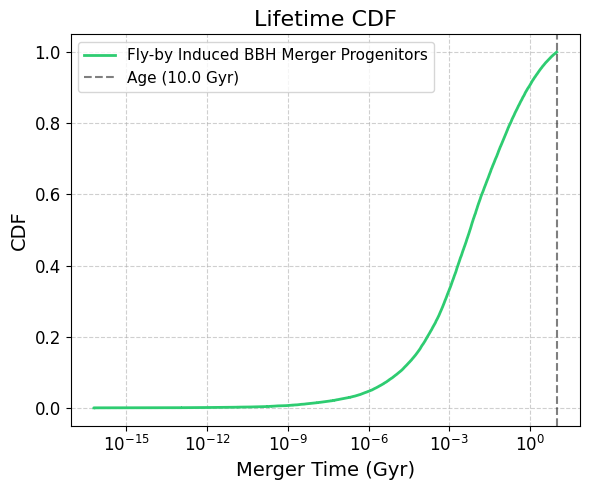

   Output List Length: 50000

[3.3] Sampling Eccentricities (MW Field)


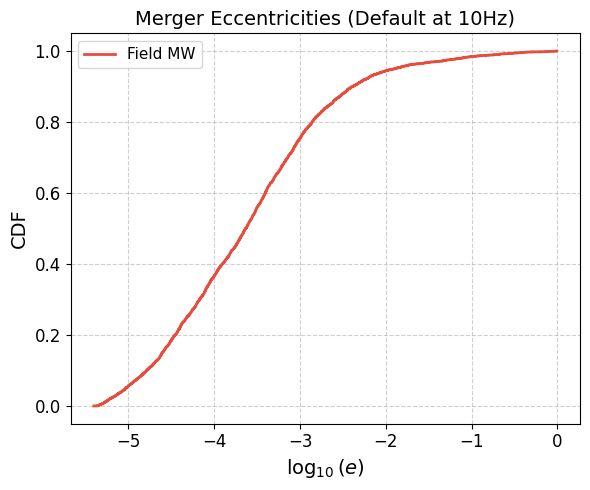

   Output Shape: (5000,)

[3.4] Snapshot: Single MW Realization
   Input: t_obs=10.0 yr, t_window_Gyr=10.0


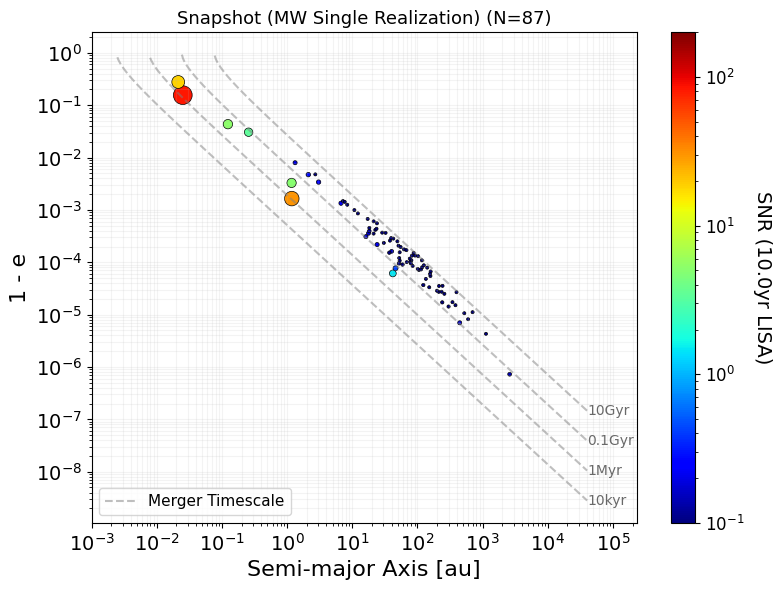

   Output List Length: 87

[3.5] Running Simulation (Giant Elliptical / M87)
   Status: Elliptical simulation saved.

[3.6] Snapshot: Elliptical Galaxy


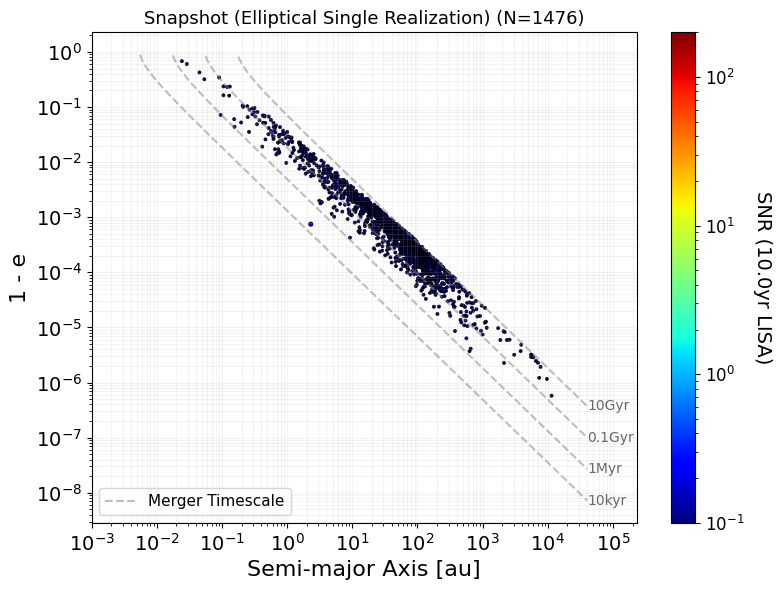

   Output List Length: 1476


In [7]:
# ==============================================================================
# MODULE 3: GALACTIC FIELD (FLY-BY)
# ==============================================================================
print("\n" + "="*80)
print(">>> MODULE 3: GALACTIC FIELD (FLY-BY)")
print("="*80)

# --- 3.1 Run Simulation (MW) ---
print("\n[3.1] Running Simulation (Milky Way Model)")
print("   Input: Detailed Physics & Galaxy Parameters (fbh=7.5e-4, fgw=10.0...)")
print("   Action: Performs MC simulation and saves results to disk (No return value).")

LISAeccentric.Field.run_simulation(
    galaxy_type='MW',
    # Physics
    m1=10.0, m2=10.0, mp=0.6, fbh=7.5e-4, fgw=10.0,
    formation_mod='starburst',
    # Structure
    n0=0.1, rsun=8000.0, Rl=2600.0, h=1000.0, sigmav=50000.0,
    # Control
    n_sim_samples=100000, target_N=50000, rrange_mw=[0.5, 15]
)
print("   Status: Simulation completed and saved.")

# --- 3.2 Inspect Progenitors ---
print("\n[3.2] Inspecting Field Progenitors")
field_progs = LISAeccentric.Field.get_progenitor(galaxy_type='MW', plot=True)
print(f"   Output List Length: {len(field_progs)}")

# --- 3.3 Sample Eccentricities ---
print("\n[3.3] Sampling Eccentricities (MW Field)")
field_e_samples = LISAeccentric.Field.sample_eccentricities(
    n=5000, galaxy_type='MW', plot=True
)
print(f"   Output Shape: {np.shape(field_e_samples)}")

# --- 3.4 Snapshots (MW) ---
print("\n[3.4] Snapshot: Single MW Realization")
print("   Input: t_obs=10.0 yr, t_window_Gyr=10.0")

field_snapshot_mw = LISAeccentric.Field.get_snapshot(
    mode='single', t_obs=10.0, t_window_Gyr=10.0, galaxy_type='MW', plot=True
)
print(f"   Output List Length: {len(field_snapshot_mw)}")

# --- 3.5 Extension: Elliptical Galaxy ---
print("\n[3.5] Running Simulation (Giant Elliptical / M87)")
LISAeccentric.Field.run_simulation(
    galaxy_type='Elliptical',
    distance_Mpc=16.8, M_gal=1.0e12, Re=8000.0,
    m1=30.0, m2=30.0, mp=0.6,
    ell_n_sim=50000, ell_target_N=20000
)
print("   Status: Elliptical simulation saved.")

print("\n[3.6] Snapshot: Elliptical Galaxy")
ell_snapshot = LISAeccentric.Field.get_snapshot(
    mode='single', galaxy_type='Elliptical', plot=True
)
print(f"   Output List Length: {len(ell_snapshot)}")


>>> MODULE 4: WAVEFORM & ANALYSIS (FUNCTIONAL API / EXTERNAL PARAMS)
Description: Demonstrates how to generate waveforms from RAW PARAMETERS
             rather than using the CompactBinary object methods.
Selected Params: M=29.1572+20.676299999999998, a=0.1564, e=0.9645

[4.1] Computing Waveform (LISAeccentric.Waveform.compute_waveform)
   Input : Explicit m1_msun, m2_msun, a_au, e, Dl_kpc, tobs_yr...


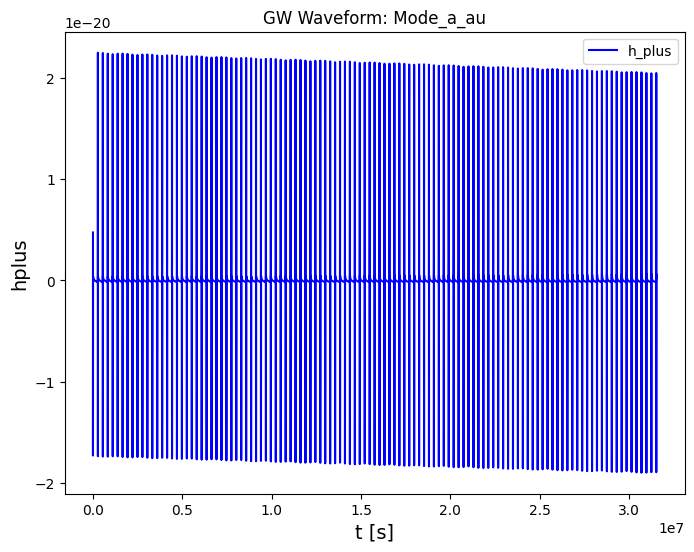

   Output Structure: List of 3 Numpy Arrays
      t_vec shape : (853567,)
      h_plus shape: (853567,)
      h_cross shape: (853567,)
   Sample time dt    : 3.6946e+01 seconds (Passed to next step)

[4.2] Computing LISA Detector Response
   Input: dt=3.69e+01s, hplus/hcross arrays


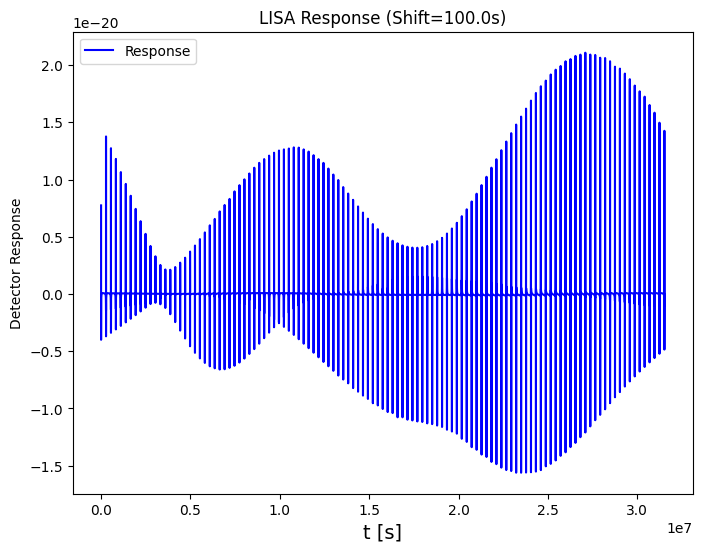

   Output Structure: List of 2 Arrays (Time, Response)
   Max Response Amplitude: 2.1084e-20

[4.3] SNR Calculation (Functional API)
   Calculating Inner Product <h+|h+>...
   Output Comparison:
     Analytical SNR (Sky-Avg): 70.9809
     Numerical SNR (Matched) : 60.1217
     Inner Product Value     : 3.6146e+03

[4.4] Orbital Evolution (Functional API)
   Method: LISAeccentric.Waveform.compute_merger_time / evolve_orbit
   Merger Time: 7.5402e+05 yr
   Evolving forward by 3.77e+05 yr...
   Result: a=6.5954e-02, e=0.917252

[4.5] Characteristic Strain (Functional API)
   A. Single System (Explicit Params)


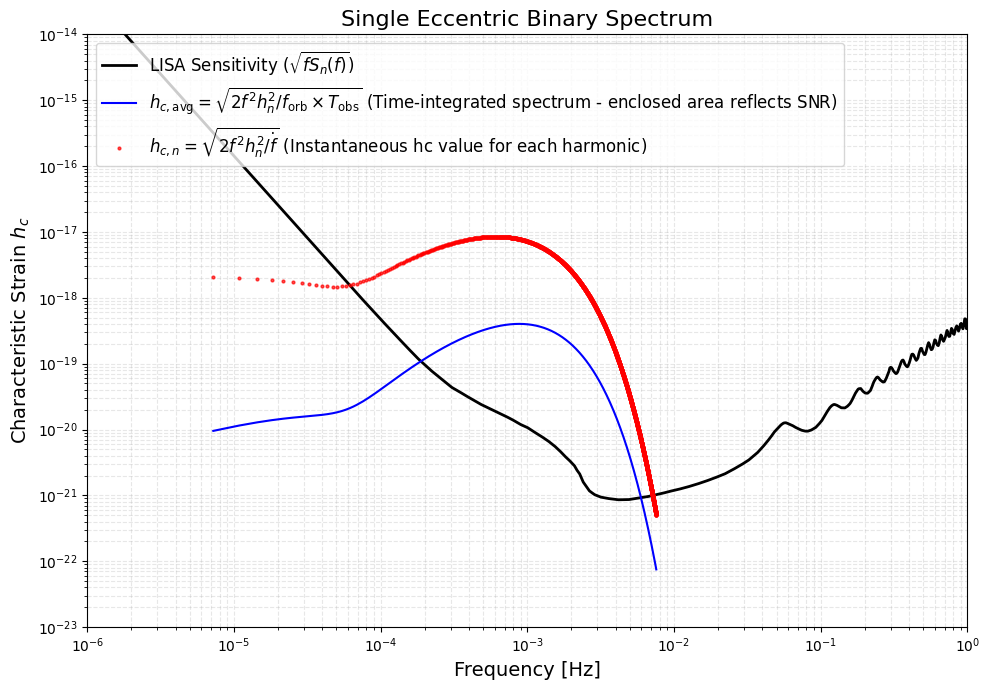

   Output: List of 4 Elements
      [0] Frequency List       (shape: (2093,))
      [1] Time-integrated Spectrum Amplitude (h_c) (shape: (2093,))
      [2] Instantaneous hc value for each harmonics (shape: (2093,))
      [3] Contribution to Snf  (shape: (2093,))
   B. Population Batch Analysis


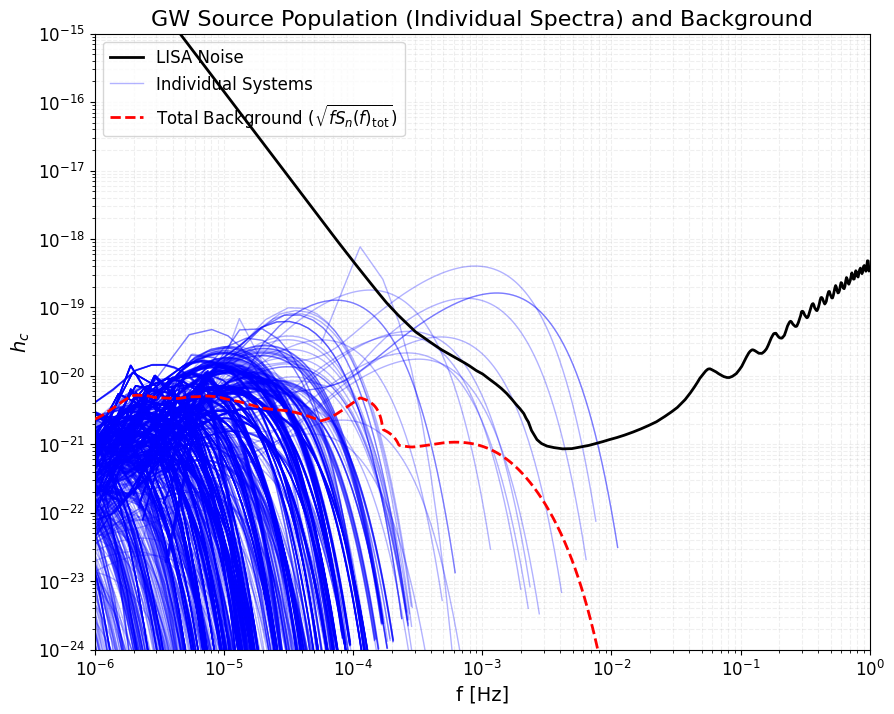

      Output: Batch Results List, [faxis, Snf_tot, all_fn_lists, all_hcavg_lists, all_hnc_lists]


In [8]:
# ==============================================================================
# MODULE 4: WAVEFORM & ANALYSIS PIPELINE (FUNCTIONAL API)
# ==============================================================================
print("\n" + "=" * 80)
print(">>> MODULE 4: WAVEFORM & ANALYSIS (FUNCTIONAL API / EXTERNAL PARAMS)")
print("=" * 80)
print("Description: Demonstrates how to generate waveforms from RAW PARAMETERS")
print("             rather than using the CompactBinary object methods.")

# Select a target system (or define variables manually)
if len(gn_snapshot) > 0:
    target_sys = gn_snapshot[0]
else:
    target_sys = my_binary

print(f"Selected Params: M={target_sys.m1}+{target_sys.m2}, a={target_sys.a:.4f}, e={target_sys.e:.4f}")

# --- 4.1 Generate Waveform (Functional) ---
print("\n[4.1] Computing Waveform (LISAeccentric.Waveform.compute_waveform)")
print("   Input : Explicit m1_msun, m2_msun, a_au, e, Dl_kpc, tobs_yr...")

# Execution: Explicitly passing parameters
waveform_data = LISAeccentric.Waveform.compute_waveform(
    m1_msun=target_sys.m1,
    m2_msun=target_sys.m2,
    a_au=target_sys.a,
    e=target_sys.e,
    Dl_kpc=target_sys.Dl,
    tobs_yr=1.0,
    points_per_peak=50,
    initial_orbital_phase=0.0,
    plot=True,
    verbose=False
)

# Explicit Unpacking & Check
if waveform_data is not None:
    t_vec, h_plus, h_cross = waveform_data[0], waveform_data[1], waveform_data[2]

    print(f"   Output Structure: List of 3 Numpy Arrays")
    print(f"      t_vec shape : {t_vec.shape}")
    print(f"      h_plus shape: {h_plus.shape}")
    print(f"      h_cross shape: {h_cross.shape}")

    # CRITICAL: Calculate Sampling Interval (dt) for next steps
    dt_val_sec = t_vec[1] - t_vec[0]
    print(f"   Sample time dt    : {dt_val_sec:.4e} seconds (Passed to next step)")
else:
    print("   Error: Waveform generation failed.")
    dt_val_sec = 1.0 # Safe fallback

# --- 4.2 LISA Detector Response (Functional) ---
print("\n[4.2] Computing LISA Detector Response")
print(f"   Input: dt={dt_val_sec:.2e}s, hplus/hcross arrays")

# Execution
lisa_resp = LISAeccentric.Waveform.compute_LISA_response(
    dt_sample_sec=dt_val_sec,
    hplus=h_plus,
    hcross=h_cross,
    theta_sky=1.0, phi_sky=2.0, psi_sky=0.5,
    timeshift_sec=100.0,
    plot=True
)
print(f"   Output Structure: List of 2 Arrays (Time, Response)")
print(f"   Max Response Amplitude: {np.max(np.abs(lisa_resp[1])):.4e}")

# --- 4.3 SNR Calculation (Analytical vs Numerical) ---
print("\n[4.3] SNR Calculation (Functional API)")

# Method A: Analytical (Using Physics Params)
snr_ana = LISAeccentric.Waveform.compute_snr_analytical(
    m1_msun=target_sys.m1, m2_msun=target_sys.m2,
    a_au=target_sys.a, e=target_sys.e,
    Dl_kpc=target_sys.Dl, tobs_yr=4.0,
)

# Method B: Numerical (Using Waveform Arrays + dt)
snr_num = LISAeccentric.Waveform.compute_snr_numerical(
    dt_sample_sec=dt_val_sec,
    strainlist=h_plus
)

# Method C: Inner Product
print("   Calculating Inner Product <h+|h+>...")
inner_prod = LISAeccentric.Waveform.compute_inner_product(
    dt_sample_sec=dt_val_sec, h1=h_plus, h2=h_plus
)

print(f"   Output Comparison:")
print(f"     Analytical SNR (Sky-Avg): {snr_ana:.4f}")
print(f"     Numerical SNR (Matched) : {snr_num:.4f}")
print(f"     Inner Product Value     : {inner_prod:.4e}")


# --- 4.4 Orbital Evolution (Functional) ---
print("\n[4.4] Orbital Evolution (Functional API)")
print("   Method: LISAeccentric.Waveform.compute_merger_time / evolve_orbit")

# 1. Merger Time
t_merge = LISAeccentric.Waveform.compute_merger_time(
    m1_msun=target_sys.m1, m2_msun=target_sys.m2,
    a0_au=target_sys.a, e0=target_sys.e
)
print(f"   Merger Time: {t_merge:.4e} yr")

# 2. Evolution
if t_merge != float('inf'):
    dt_evol = t_merge / 2.0
    print(f"   Evolving forward by {dt_evol:.2e} yr...")
    a_ev, e_ev = LISAeccentric.Waveform.evolve_orbit(
        m1_msun=target_sys.m1, m2_msun=target_sys.m2,
        a0_au=target_sys.a, e0=target_sys.e, delta_t_yr=dt_evol
    )
    print(f"   Result: a={a_ev:.4e}, e={e_ev:.6f}")

# --- 4.5 Characteristic Strain (Functional) ---
print("\n[4.5] Characteristic Strain (Functional API)")

# Case A: Single System
print("   A. Single System (Explicit Params)")
hc_res = LISAeccentric.Waveform.compute_characteristic_strain_single(
    m1_msun=target_sys.m1, m2_msun=target_sys.m2,
    a_au=target_sys.a, e=target_sys.e, Dl_kpc=target_sys.Dl,
    tobs_yr=4.0, plot=True
)
strain_res_list=hc_res
if isinstance(strain_res_list, list) and len(strain_res_list) == 4:
    print(f"   Output: List of 4 Elements")
    print(f"      [0] Frequency List       (shape: {strain_res_list[0].shape})")
    print(f"      [1] Time-integrated Spectrum Amplitude (h_c) (shape: {strain_res_list[1].shape})")
    print(f"      [2] Instantaneous hc value for each harmonics (shape: {strain_res_list[2].shape})")
    print(f"      [3] Contribution to Snf  (shape: {strain_res_list[3].shape})")
else:
    print(f"   Output: {type(strain_res_list)}")

# Case B: Population Batch
print("   B. Population Batch Analysis")
# Note: This function expects a list of objects, but is part of the functional module
if len(gn_snapshot) > 0:
    batch_res = LISAeccentric.Waveform.run_population_strain_analysis(
        binary_list=gn_snapshot, tobs_yr=4.0, plot=True
    )
    print(f"      Output: Batch Results List,"
          f" [faxis, Snf_tot, all_fn_lists, all_hcavg_lists, all_hnc_lists]")


>>> MODULE 5: NOISE MANAGEMENT

[5.1] Generating Synthetic N2A5 Noise Data
   Action: Defining complex N2A5 foreground model locally.
   Generated Data: 3000 points.
   Freq Range: [1.0e-05, 1.0e+00] Hz


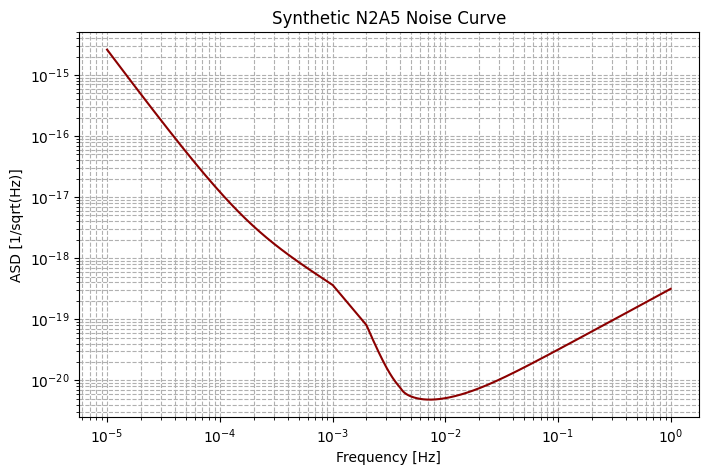


[5.2] Updating System Noise Curve
   Input: [Frequency_Array, ASD_Array]
   Status: Global _LISA_NOISE_DATA updated. File overwritten with backup.

[5.3] Testing Recovery Options
   A. Revert to backup #1...
   B. Load 'Official' preset...

[5.4] Retrieving Current Noise Curve


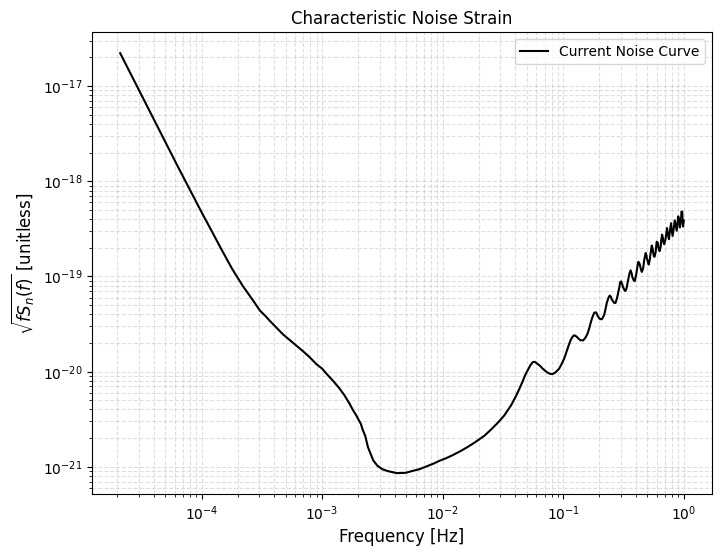

   Output Structure: List [Freq_Array, Strain_Array]
   Current Min Freq: 2.11e-05 Hz

TUTORIAL COMPLETED SUCCESSFULLY


In [9]:
# ==============================================================================
# MODULE 5: NOISE MANAGEMENT (NOISE HANDLER)
# ==============================================================================
print("\n" + "=" * 80)
print(">>> MODULE 5: NOISE MANAGEMENT")
print("=" * 80)

# --- 5.1 Generate Synthetic Noise Data (N2A5 Model) ---
print("\n[5.1] Generating Synthetic N2A5 Noise Data")
print("   Action: Defining complex N2A5 foreground model locally.")

def generate_n2a5_data(f_min=1e-5, f_max=1.0, n_points=3000):
    """Generates LISA Noise ASD based on the N2A5 foreground model."""
    m_sun = 1.9891e30 * sciconsts.G / np.power(sciconsts.c, 3.0)

    # Vectorized S_gal_N2A5
    def S_gal_N2A5_vec(f):
        conds = [
            (f >= 1.0e-5) & (f < 1.0e-3),
            (f >= 1.0e-3) & (f < 10 ** -2.7),
            (f >= 10 ** -2.7) & (f < 10 ** -2.4),
            (f >= 10 ** -2.4) & (f <= 0.01)
        ]
        funcs = [
            lambda x: x ** -2.3 * 10 ** -44.62 * 20.0 / 3.0,
            lambda x: x ** -4.4 * 10 ** -50.92 * 20.0 / 3.0,
            lambda x: x ** -8.8 * 10 ** -62.8 * 20.0 / 3.0,
            lambda x: x ** -20.0 * 10 ** -89.68 * 20.0 / 3.0
        ]
        return np.piecewise(f, conds, funcs + [0])

    # Vectorized S_n_lisa
    def S_n_lisa_calc(f):
        m1 = 5.0e9
        m2 = sciconsts.c * 0.41 / m1 / 2.0
        term1 = 20.0 / 3.0 * (1 + (f / m2) ** 2)
        term2 = 4.0 * (9.0e-30 / (2 * np.pi * f) ** 4 * (1 + 1.0e-4 / f)) + 2.96e-23 + 2.65e-23
        return term1 * term2 / m1 ** 2 + S_gal_N2A5_vec(f)

    flist = np.logspace(np.log10(f_min), np.log10(f_max), n_points)
    Sn_list = S_n_lisa_calc(flist)
    return flist, np.sqrt(Sn_list)

# Execution
f_new, asd_new = generate_n2a5_data()
print(f"   Generated Data: {len(f_new)} points.")
print(f"   Freq Range: [{f_new[0]:.1e}, {f_new[-1]:.1e}] Hz")

# Plotting the generated noise
plt.figure(figsize=(8, 5))
plt.loglog(f_new, asd_new, label='Generated N2A5 Model', color='darkred')
plt.title("Synthetic N2A5 Noise Curve")
plt.xlabel("Frequency [Hz]")
plt.ylabel("ASD [1/sqrt(Hz)]")
plt.grid(True, which='both', linestyle='--')
plt.show()

# --- 5.2 Update Noise Curve ---
print("\n[5.2] Updating System Noise Curve")
print("   Input: [Frequency_Array, ASD_Array]")

# Execution
LISAeccentric.Noise.update_noise_curve([f_new, asd_new])
print("   Status: Global _LISA_NOISE_DATA updated. File overwritten with backup.")

# --- 5.3 Recover Noise Curve ---
print("\n[5.3] Testing Recovery Options")

# A. Revert to Backup
print("   A. Revert to backup #1...")
LISAeccentric.Noise.recover_noise_curve(version=1)

# B. Load Official Preset
print("   B. Load 'Official' preset...")
LISAeccentric.Noise.recover_noise_curve(version='official')

# --- 5.4 Verify Current Curve ---
print("\n[5.4] Retrieving Current Noise Curve")
curve_data = LISAeccentric.Noise.get_noise_curve(plot=True)
if curve_data is not None:
    print(f"   Output Structure: List [Freq_Array, Strain_Array]")
    print(f"   Current Min Freq: {curve_data[0][0]:.2e} Hz")

# Cleanup
LISAeccentric.Noise.clean_backups()
print("\n" + "=" * 80)
print("TUTORIAL COMPLETED SUCCESSFULLY")
print("=" * 80)